In [1]:
from importlib import reload

import DataProvider
import Betas

reload(DataProvider)
reload(Betas)

<module 'Betas' from '/home/vincent/vincent/sharedwork/data/market-hedging/Betas.py'>

# Compute betas

In [2]:
%%time

start_date = "2013-10-01"
end_date = "2018-10-01"

n_stocks = 300

# We take a random set of stocks
# TODO Ensure there's a certain proportion of small/medium/large stocks

load_param = True

if load_param
    data = DataProvider.load_securities()
else:
    data = DataProvider.get_random_securities(n_stocks, start_date, end_date, online=False)
    
data_ref = DataProvider.get_reference_security(start_date, end_date)

CPU times: user 98.4 ms, sys: 39.6 ms, total: 138 ms
Wall time: 1.59 s


In [3]:
data.groupby("symbol").describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAXN,2221.0,17.919408,14.751332,3.580000,5.440000,16.130000,24.520000,74.890000
ABR-P-A,1034.0,21.593415,2.407065,17.410979,19.220234,21.705874,23.609181,25.999900
ACHV,2221.0,78.239154,71.002962,1.000000,6.961900,40.040000,142.560000,247.170000
ACOM,763.0,26.820904,7.163960,13.530000,21.830000,26.700000,31.845000,45.700000
ACTS,1755.0,2.049067,0.402432,1.300000,1.695000,2.040000,2.330050,3.370000
ADMP,2221.0,5.491076,2.919078,2.250000,3.600000,4.400000,6.260000,17.850000
AER,2221.0,30.786097,16.418112,7.680000,12.960000,37.610000,45.110000,57.910000
AFA,1255.0,21.979546,2.420533,16.845254,19.884085,22.538143,24.200225,25.560000
AFSI-P-B,1034.0,20.141416,1.591795,14.940000,19.216151,20.029055,21.635647,23.119678


In [4]:
%%time

df = Betas.attach_return(data, "symbol")
df_ref = Betas.attach_return(data_ref, "symbol")

df0 = df.reset_index().merge(
    df_ref.reset_index().drop("symbol", axis=1),
    on="date",
    suffixes=["", "_ref"]
).dropna().set_index(df.index.names)

CPU times: user 2.57 s, sys: 88.6 ms, total: 2.66 s
Wall time: 2.65 s


In [5]:
%%time
df = Betas.attach_beta(df0, "return_ref", "return", "symbol", 15, numpy=False)

CPU times: user 2min 55s, sys: 65.6 ms, total: 2min 55s
Wall time: 2min 55s


In [6]:
%%time
df = Betas.attach_beta(df0, "return_ref", "return", "symbol", 15, numpy=True)

CPU times: user 1min 38s, sys: 200 ms, total: 1min 38s
Wall time: 1min 38s


In [7]:
df.head(10)

,,adjClose,return,adjClose_ref,return_ref,beta
symbol,date,,,,,
NDN,2010-01-05,13.350000,0.003759,95.339988,0.002647,0.000010
CLX,2010-01-05,47.764296,0.010907,95.339988,0.002647,0.000029
FCCY,2010-01-05,3.775922,-0.040000,95.339988,0.002647,-0.000106
AZN,2010-01-05,14.981772,-0.020249,95.339988,0.002647,-0.000054
WAFD,2010-01-05,16.964538,0.027551,95.339988,0.002647,0.000073
YGYI,2010-01-05,5.320000,-0.113333,95.339988,0.002647,-0.000300
ICGE,2010-01-05,6.660000,-0.024890,95.339988,0.002647,-0.000066
IWA,2010-01-05,16.371923,-0.005879,95.339988,0.002647,-0.000016
BRID,2010-01-05,10.730345,-0.009091,95.339988,0.002647,-0.000024


For faster implementation, here are some alternative:

* Each regression can be computed in parallel. Dask is a library that implements numpy/pandas in parallel.
* Each security can be computed in parallel, and the least square solution for each security can be found by gradient descent using an exponentially decaying momentum in the gradient, by going through the points in a chronological order. This has the advantage that the data only has to be read once, and does not need to be loaded completely in memory, but this may affect the betas obtained.

Further development:

* Integrated code tests
* Validate and sanitize input
* Handle missing values
* Clean outliers
* Include standard errors on betas
* Non-parametric estimation of betas

# Analyse betas

In [90]:
df.describe()

,adjClose,return,adjClose_ref,return_ref,beta
count,414673.000000,414673.000000,414673.000000,414673.000000,414673.000000
mean,618.182612,0.004040,177.922694,0.000498,0.983188
std,11284.759024,1.975060,55.940704,0.009035,21.842740
min,0.028500,-0.999141,86.514408,-0.065123,-1138.681837
25%,8.777097,-0.009787,123.330790,-0.003191,0.138263
50%,19.205642,0.000000,182.865372,0.000596,0.786241
75%,33.080000,0.009926,212.238388,0.005035,1.477574
max,488595.308157,1268.922589,292.256194,0.046499,8053.925008


In [103]:
df["beta"].quantile([.01,.99])

0.01   -3.548907
0.99    5.761736
Name: beta, dtype: float64

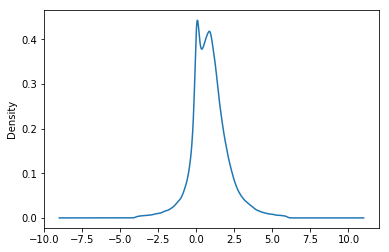

In [108]:
threshold = 5
# p = df["beta"].plot(kind="density", xlim=(1-threshold,1+threshold))

ind = (df["beta"] > 1-threshold) & (df["beta"] < 1+threshold)
p = df.loc[ind, "beta"].plot(kind="density")

Betas below -4 and above 6 are suspicious.

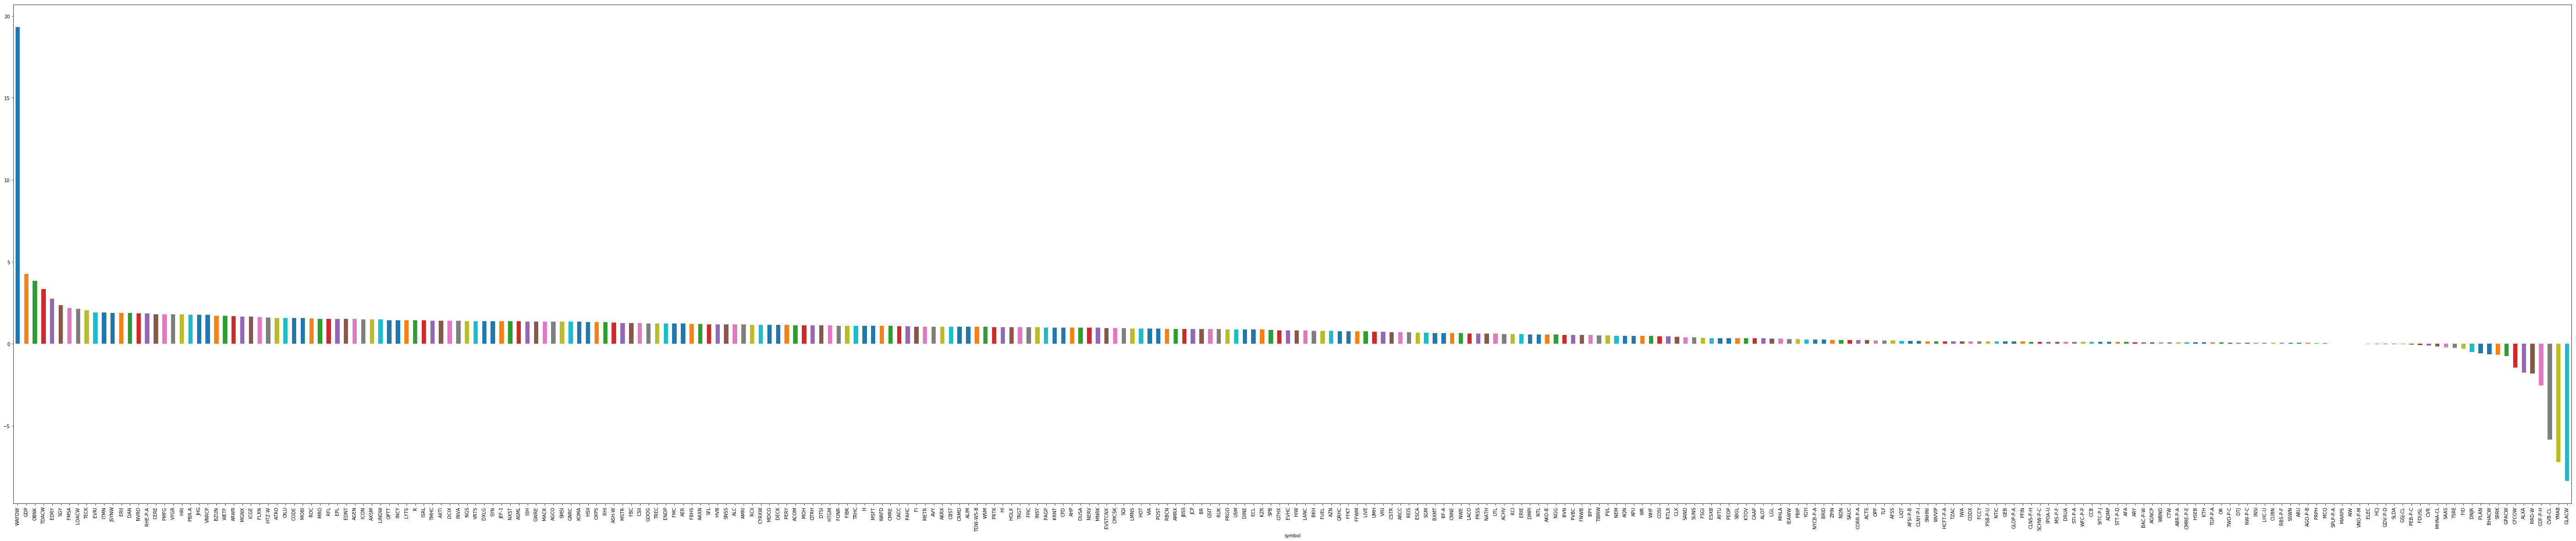

In [89]:
b = df.groupby("symbol")["beta"]

p = b.mean().sort_values(ascending=False).plot("bar", figsize=(100,20))

In [17]:
d = b.describe()
d

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAXN,2220.0,1.212373,4.107847,-1.192943e+02,0.746397,1.298930,1.958719,6.389811
ABR-P-A,1033.0,0.095537,0.324721,-1.056408e+00,-0.067649,0.070321,0.208538,1.626689
ACHV,2220.0,0.600231,5.593352,-1.061549e+02,0.163808,0.921658,1.711704,21.416968
ACOM,762.0,1.141719,1.154487,-5.721917e+00,0.639822,1.193593,1.672306,11.642299
ACTS,1754.0,0.221664,1.027399,-5.598352e+00,-0.182406,0.252911,0.644340,8.410932
ADMP,2220.0,0.113987,2.960114,-6.630765e+01,-0.742786,0.316577,1.290984,12.978858
AER,2220.0,1.229295,1.169008,-2.722160e+00,0.710432,1.184838,1.604886,30.218545
AFA,1254.0,0.109840,0.295960,-9.604542e-01,-0.046164,0.080108,0.212509,1.850093
AFSI-P-B,1033.0,0.178779,0.484235,-2.664978e+00,-0.011845,0.158932,0.341561,2.504188


There are suspicious outliers, when looking at the 25/75 percentile vs min/max.

We drop the stocks without variation in beta.

In [ ]:
threshold = 10**(-3)
l = list(d[d["std"] < threshold].index)

d.loc[l,:]

In [19]:
df.drop(index=l, inplace=True)

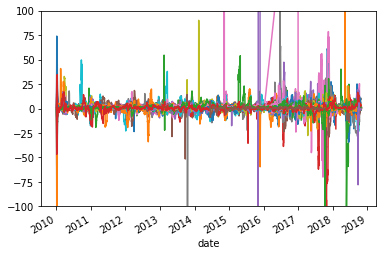

In [72]:
p = df.reset_index("symbol").groupby("symbol")["beta"].plot(ylim=(-100,100))

count    2220.000000
mean        0.982500
std         1.486680
min        -4.643475
25%         0.728328
50%         0.890617
75%         1.021114
max        40.919074
Name: beta, dtype: float64

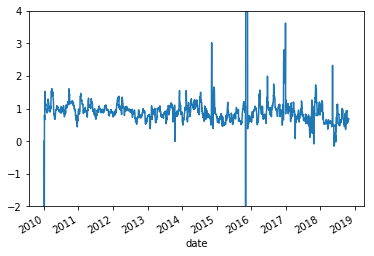

In [80]:
threshold = 3
d = df.reset_index().groupby("date").mean()["beta"]
p = d.plot(ylim=(1-threshold,1+threshold))

d.describe()

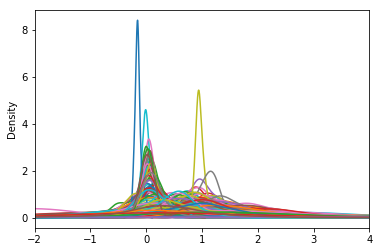

In [81]:
threshold = 3
p = df.reset_index("symbol").groupby("symbol")["beta"].plot(kind="density", xlim=(1-threshold, 1+threshold))

For names without history, we can
* wait for history to populate
* use an average of stocks that are expected to be similar